### Import packages and set config

In [1]:
import os
os.chdir(os.path.dirname(os.path.abspath('..')))

import pandas as pd
import numpy as np

from tqdm.asyncio import tqdm

import umap.umap_ as umap

# For clustering
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from experiments.helpers.scatterplot import scatterplot
from experiments.helpers.silhouette_elbow  import elbowplot, silhouetteplot
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
from clusteval import clusteval
from mpl_toolkits.mplot3d import Axes3D

## Clustering analysis

In [ ]:
embedding_df = pd.read_csv('/hadatasets/fillipe.silva/LLMSegm/data/olist/gpt2-medium_30_test_embeddings_rfm.csv')

NameError: name 'pd' is not defined

### Determining The Optimal Number Of Clusters

[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were f

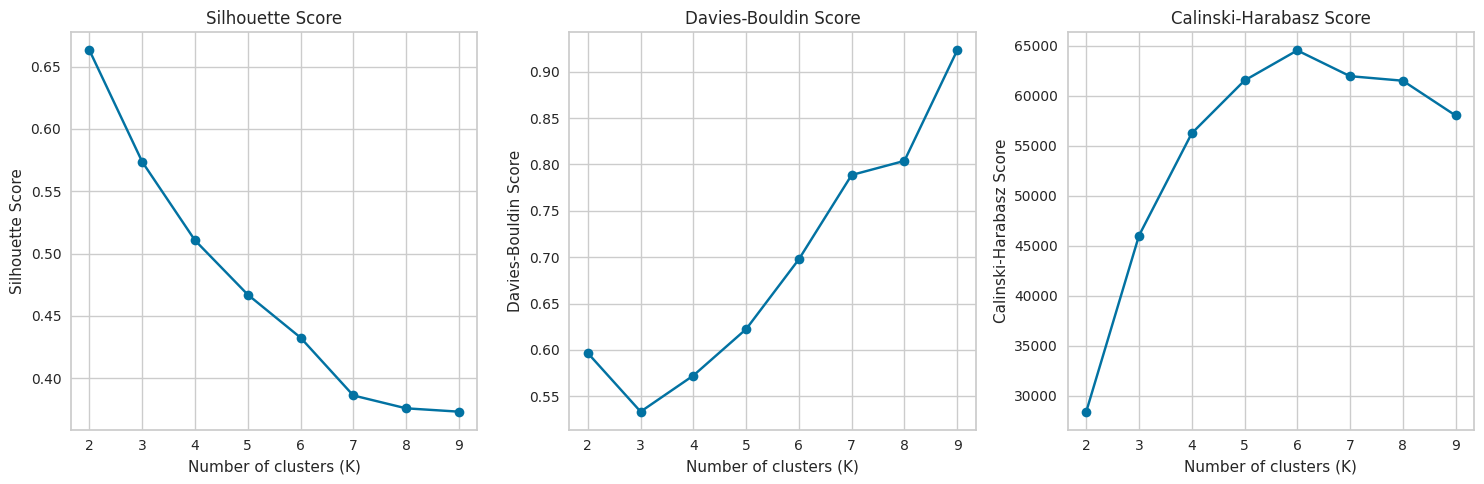

In [47]:
# Generate synthetic data
X = embedding_df

# Range of K to try
K_range = range(2, 10)

# Storage for metric scores
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

# Calculate metrics for each K
for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=10)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))
    davies_bouldin_scores.append(davies_bouldin_score(X, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(X, labels))

# Plotting
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 2)
plt.plot(K_range, davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Score')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Davies-Bouldin Score')

plt.subplot(1, 3, 3)
plt.plot(K_range, calinski_harabasz_scores, marker='o')
plt.title('Calinski-Harabasz Score')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Calinski-Harabasz Score')

plt.tight_layout()
plt.show()

In [7]:
OPTIMAL_CLUSTERS = 2
N_INIT = 10
MAX_ITER = 100

In [ ]:
ce = clusteval(evaluate='silhouette',
               cluster='kmeans',
               min_clust=2,
               verbose='info')
results = ce.fit(embedding_df)

### TSN-e Visualization

In [8]:
tsne = TSNE(n_components=3, verbose=1, perplexity=200, n_iter=5000, learning_rate=200)
X_3d = tsne.fit_transform(embedding_df)

[t-SNE] Computing 601 nearest neighbors...
[t-SNE] Indexed 22514 samples in 11.544s...
[t-SNE] Computed neighbors for 22514 samples in 64.502s...
[t-SNE] Computed conditional probabilities for sample 1000 / 22514
[t-SNE] Computed conditional probabilities for sample 2000 / 22514
[t-SNE] Computed conditional probabilities for sample 3000 / 22514
[t-SNE] Computed conditional probabilities for sample 4000 / 22514
[t-SNE] Computed conditional probabilities for sample 5000 / 22514
[t-SNE] Computed conditional probabilities for sample 6000 / 22514
[t-SNE] Computed conditional probabilities for sample 7000 / 22514
[t-SNE] Computed conditional probabilities for sample 8000 / 22514
[t-SNE] Computed conditional probabilities for sample 9000 / 22514
[t-SNE] Computed conditional probabilities for sample 10000 / 22514
[t-SNE] Computed conditional probabilities for sample 11000 / 22514
[t-SNE] Computed conditional probabilities for sample 12000 / 22514
[t-SNE] Computed conditional probabilities for 

In [9]:
km = KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=MAX_ITER)
km.fit(X_3d)

KMeans(max_iter=100, n_clusters=2, n_init=10)

[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were f

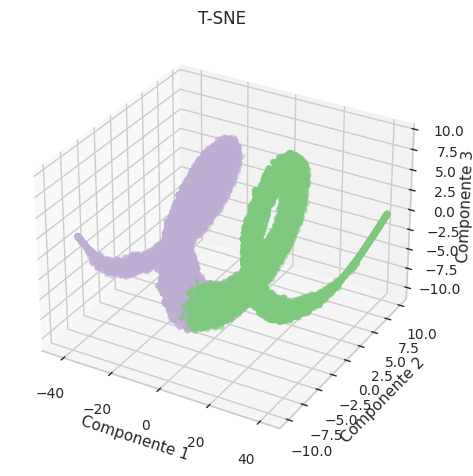

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=plt.cm.Accent(km.labels_), s=20)

ax.set_title('T-SNE')
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')
plt.show()

### Reducing

In [5]:
reducer = umap.UMAP(n_neighbors=10, n_components=10, metric="cosine", random_state=42)
data_umap = reducer.fit_transform(embedding_df)

/home/fillipe.silva/miniconda3/envs/llmsegm/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


### Metrics

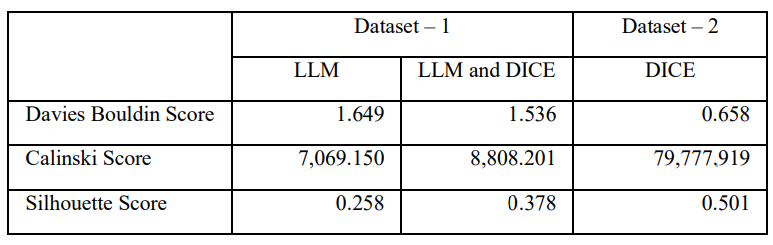

In [9]:
#The Davies-Bouldin index is a metric for evaluating clustering algorithms where a lower score indicates 
#clusters with high similarity within themselves and low similarity between clusters.
kmeans = KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=MAX_ITER).fit(embedding_df)
ylabel = kmeans.labels_
print("Davies-Bouldin Index (without umap):", davies_bouldin_score(embedding_df, ylabel))

#The Calinski-Harabasz index, also known as the variance ratio criterion, is a measure of cluster validity, 
#where a higher score indicates better-defined clusters characterized by tight cohesion within clusters and good separation between clusters.
kmeans = KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=MAX_ITER).fit(embedding_df)
print("Calinski Harabasz Score (without umap):", calinski_harabasz_score(embedding_df, kmeans.labels_))

#The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters, 
#with a higher score indicating a better fit of objects within their own cluster and greater separation from other clusters.
kmeans = KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=MAX_ITER)
print("Silhouette Score (without umap):", silhouette_score(embedding_df, kmeans.fit_predict(embedding_df)))

Davies-Bouldin Index (without umap): 0.6164128455111435


In [ ]:
#The Davies-Bouldin index is a metric for evaluating clustering algorithms where a lower score indicates 
#clusters with high similarity within themselves and low similarity between clusters.
kmeans = KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=1000).fit(data_umap)
ylabel = kmeans.labels_
dbi = davies_bouldin_score(data_umap, ylabel)
print("Davies-Bouldin Index (with umap):", dbi)

#The Calinski-Harabasz index, also known as the variance ratio criterion, is a measure of cluster validity, 
#where a higher score indicates better-defined clusters characterized by tight cohesion within clusters and good separation between clusters.
kmeans = KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=MAX_ITER).fit(data_umap)
print("Calinski Harabasz Score (with umap):", calinski_harabasz_score(data_umap, kmeans.labels_))

#The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters, 
#with a higher score indicating a better fit of objects within their own cluster and greater separation from other clusters.
kmeans = KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=MAX_ITER)
print("Silhouette Score (with umap):", silhouette_score(data_umap, kmeans.fit_predict(data_umap)))

'''
Davies-Bouldin Index (with umap): 1.0978499336637113
Calinski Harabasz Score (with umap): 1386.537068045779
Silhouette Score (with umap): 0.30870458
'''